In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt


from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D,MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator

from keras.utils import np_utils


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
trainPath="/content/drive/MyDrive/Deep Learning/chest_xray_dataset/train"
testPath="/content/drive/MyDrive/Deep Learning/chest_xray_dataset/test"


train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,         
    zoom_range=0.5,
    horizontal_flip=True,
    validation_split=0.1
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1) 
test_datagen=ImageDataGenerator(rescale=1./255)



trainDataGen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

testDataGen=ImageDataGenerator(rescale=1./255)

trainGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(255,255),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

valGen=trainDataGen.flow_from_directory(
    trainPath,
    target_size=(255,255),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='validation')

testGen=testDataGen.flow_from_directory(
    testPath,
    target_size=(255,255),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=1)

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
alexnet=Sequential()
alexnet.add(Conv2D(96,kernel_size=(7,7),strides=(4,4),activation='relu',input_shape=(255,255,3))) 

alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(ZeroPadding2D((2,2)))

alexnet.add(Conv2D(255,kernel_size=(5,5),activation='relu',strides=(1,1)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(ZeroPadding2D((1,1)))
alexnet.add(Conv2D(364,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(ZeroPadding2D((1,1)))


alexnet.add(Conv2D(364,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(ZeroPadding2D((1,1)))
alexnet.add(Conv2D(255,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

alexnet.add(Conv2D(255,kernel_size=(3,3),activation='relu',strides=(1,1)))
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
alexnet.add(Flatten())
alexnet.add(Dense(2048,activation='relu'))
alexnet.add(Dropout(0.5))
alexnet.add(Dense(2048,activation='relu'))
alexnet.add(Dropout(0.5))

alexnet.add(Dense(3,activation='softmax'))
alexnet.summary()

alexnet.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 63, 63, 96)        14208     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 96)        0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 35, 35, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 255)       612255    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 255)       0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 17, 17, 255)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 364)      

In [ ]:
history=alexnet.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//32,
    validation_data=valGen,
    epochs=10,
    validation_steps=valGen.samples//32
)

Epoch 1/10
147/147 [==============================] - 1471s 10s/step - loss: 1.0706 - accuracy: 0.4607 - val_loss: 1.0530 - val_accuracy: 0.4863
Epoch 2/10
147/147 [==============================] - 802s 5s/step - loss: 1.0337 - accuracy: 0.5001 - val_loss: 1.0531 - val_accuracy: 0.4824
Epoch 3/10
147/147 [==============================] - 801s 5s/step - loss: 1.0409 - accuracy: 0.4957 - val_loss: 0.9419 - val_accuracy: 0.5020
Epoch 4/10
147/147 [==============================] - 809s 5s/step - loss: 0.8258 - accuracy: 0.6392 - val_loss: 0.7004 - val_accuracy: 0.7402
Epoch 5/10
147/147 [==============================] - 806s 5s/step - loss: 0.6976 - accuracy: 0.6939 - val_loss: 0.6685 - val_accuracy: 0.7422
Epoch 6/10
147/147 [==============================] - 804s 5s/step - loss: 0.6486 - accuracy: 0.7203 - val_loss: 0.6644 - val_accuracy: 0.7910
Epoch 7/10
147/147 [==============================] - 799s 5s/step - loss: 0.5971 - accuracy: 0.7507 - val_loss: 0.6126 - val_accuracy: 0.75

Text(0.5, 1.0, 'Accuracy Curves')

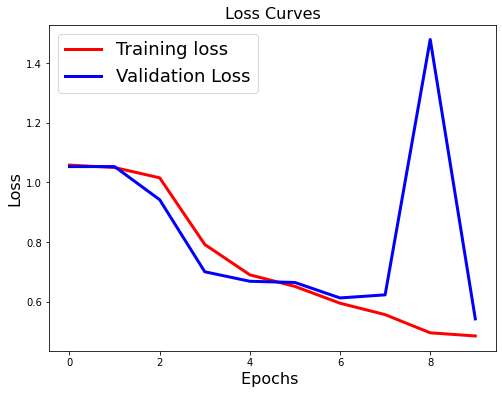

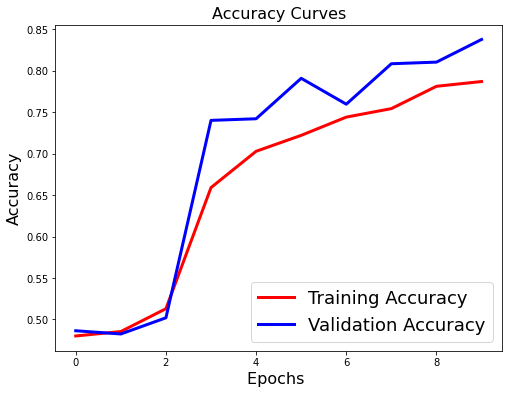

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
validation_generator=valGen


Y_pred = alexnet.predict_generator(validation_generator, trainGen.samples // 15+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Normal', 'Bacteria', 'Virus']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 43  68  23]
 [ 83 127  43]
 [ 26  78  30]]
Classification Report
              precision    recall  f1-score   support

      Normal       0.28      0.32      0.30       134
    Bacteria       0.47      0.50      0.48       253
       Virus       0.31      0.22      0.26       134

    accuracy                           0.38       521
   macro avg       0.35      0.35      0.35       521
weighted avg       0.38      0.38      0.38       521

